In [1]:
import kagglehub

path = kagglehub.dataset_download("muhdaniyal/supermarket-sales-cleaned-dataset")

print("Path to dataset files:", path)


100%|██████████| 38.7k/38.7k [00:00<00:00, 28.6MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/muhdaniyal/supermarket-sales-cleaned-dataset/versions/1


In [2]:
from google.colab import files
import pandas as pd
import io

uploaded = files.upload()
filename = list(uploaded.keys())[0]
data = pd.read_csv(io.BytesIO(uploaded[filename]))
data.head()

Saving Supermarket Sales Cleaned.csv to Supermarket Sales Cleaned.csv


,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Day,Month,Year
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1,5,1,2019
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6,8,3,2019
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,4.761905,16.2155,7.4,3,3,2019
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33,Ewallet,465.76,4.761905,23.2880,8.4,27,1,2019
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37,Ewallet,604.17,4.761905,30.2085,5.3,8,2,2019


In [4]:

import pandas as pd

top_5_products = data.groupby('Product line')['Quantity'].sum().sort_values(ascending=False).head(5)
top_5_products


,Quantity
Product line,
Electronic accessories,971
Food and beverages,952
Sports and travel,920
Home and lifestyle,911
Fashion accessories,902


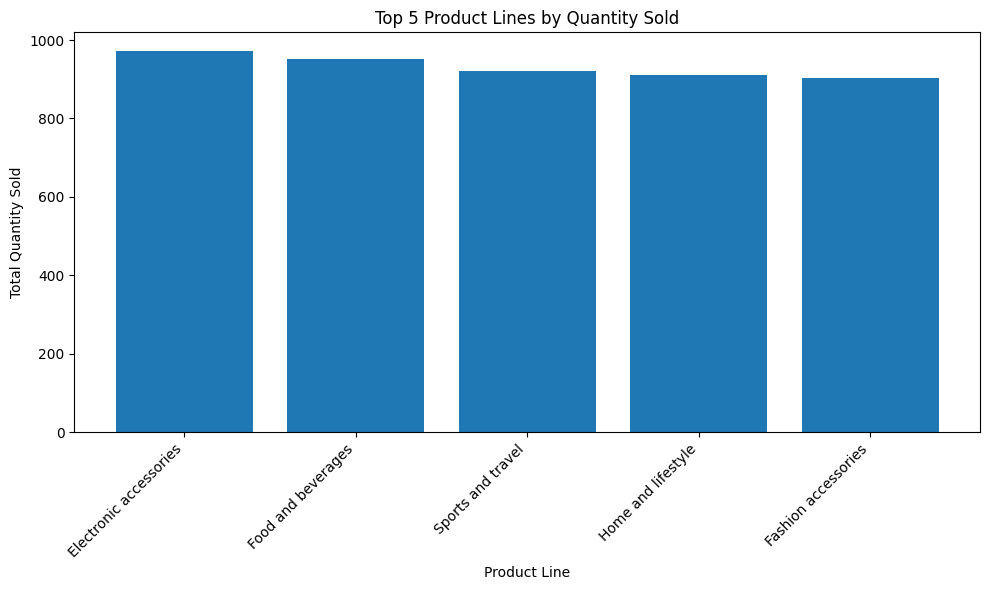

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(top_5_products.index, top_5_products.values)
plt.xlabel("Product Line")
plt.ylabel("Total Quantity Sold")
plt.title("Top 5 Product Lines by Quantity Sold")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


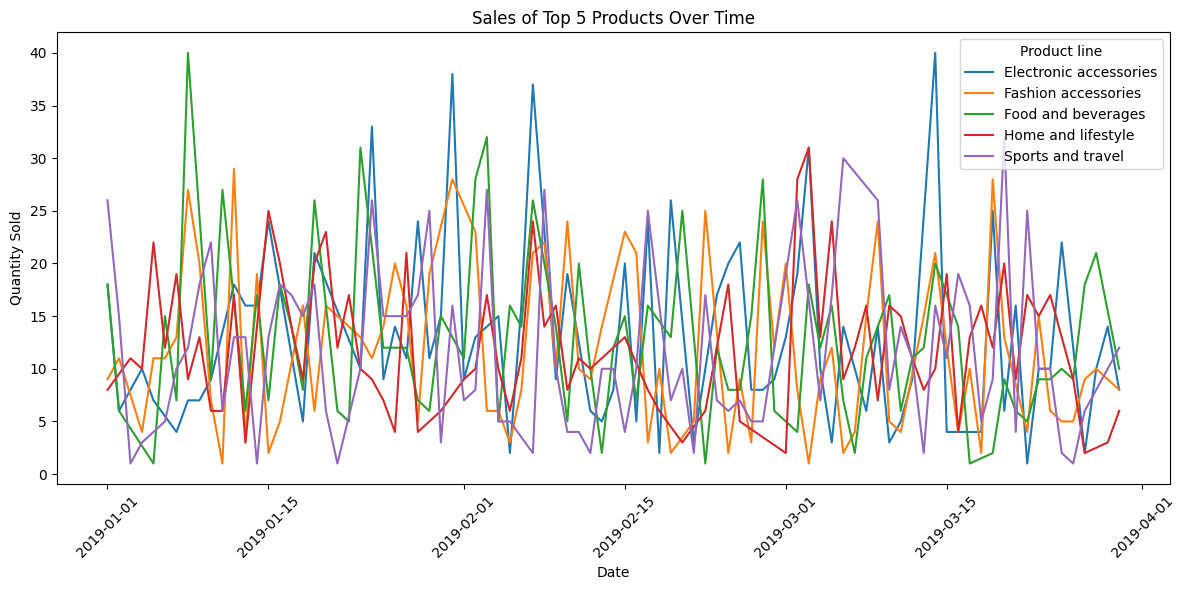

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

data['Date'] = pd.to_datetime(data['Date'])

product_sales_over_time = data.groupby(['Date', 'Product line'])['Quantity'].sum().reset_index()

top_5_products = data.groupby('Product line')['Quantity'].sum().sort_values(ascending=False).head(5).index

filtered_data = product_sales_over_time[product_sales_over_time['Product line'].isin(top_5_products)]

plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Quantity', hue='Product line', data=filtered_data)
plt.title('Sales of Top 5 Products Over Time')
plt.xlabel('Date')
plt.ylabel('Quantity Sold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<ipython-input-7-8bbb08e070c8>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Date'] = pd.to_datetime(filtered_data['Date'])
<ipython-input-7-8bbb08e070c8>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Month'] = filtered_data['Date'].dt.to_period('M')


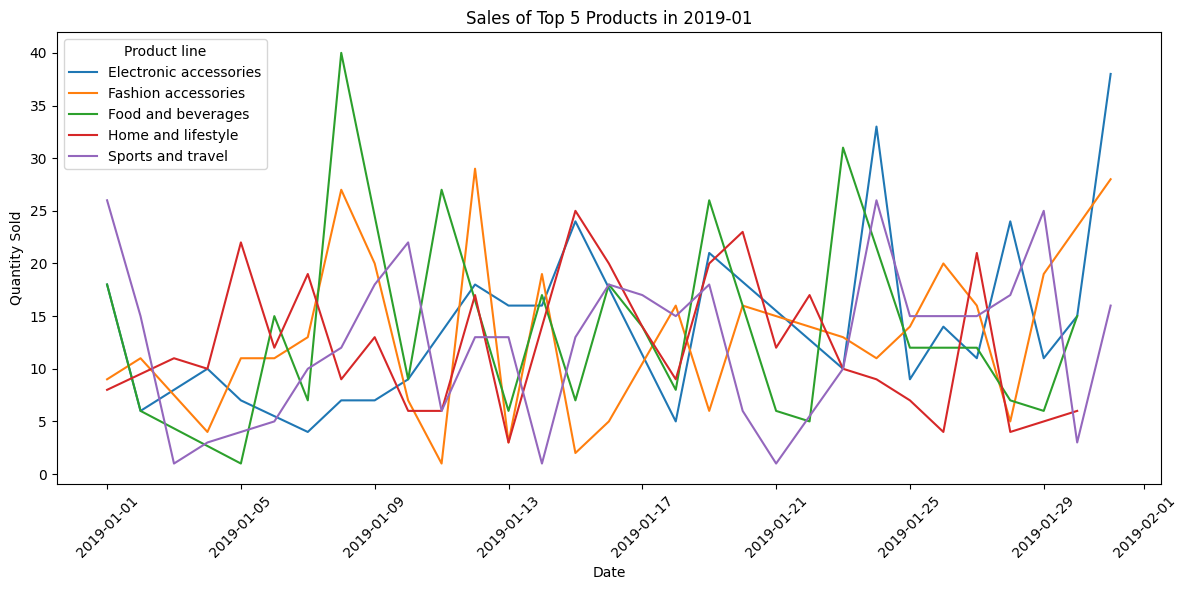

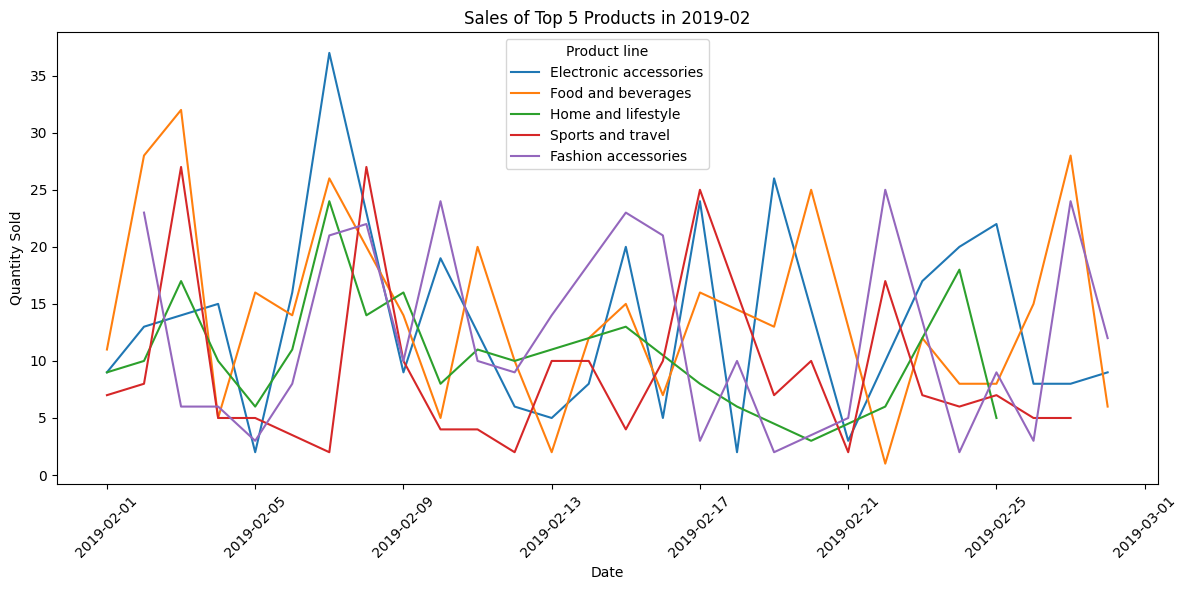

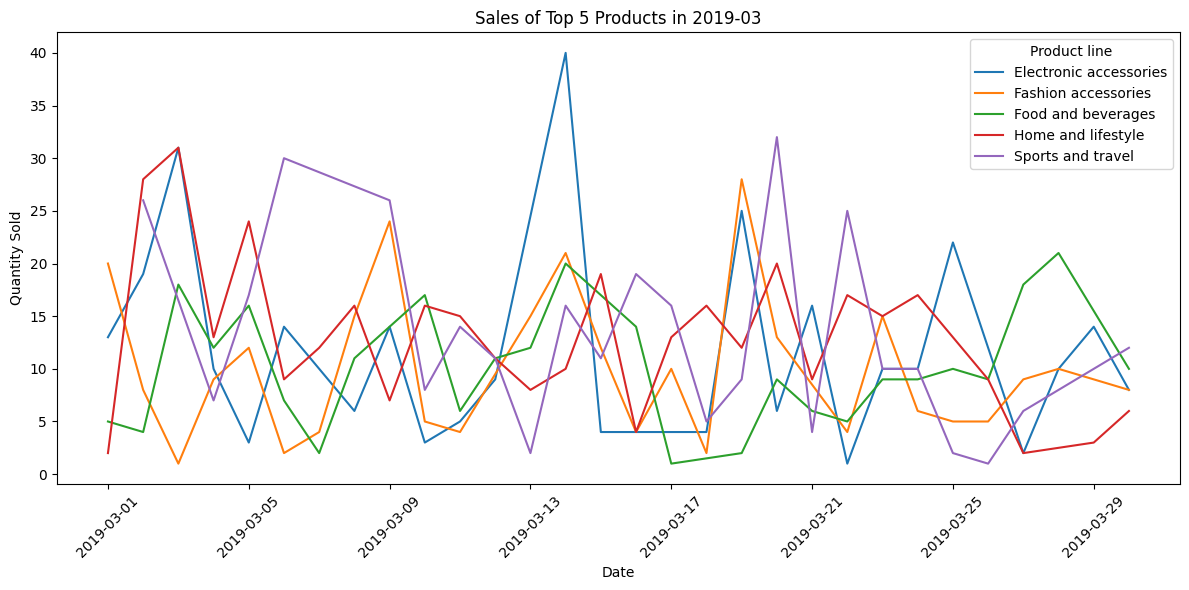

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

filtered_data['Date'] = pd.to_datetime(filtered_data['Date'])

filtered_data['Month'] = filtered_data['Date'].dt.to_period('M')

for month in filtered_data['Month'].unique():
    monthly_data = filtered_data[filtered_data['Month'] == month]
    plt.figure(figsize=(12, 6))
    sns.lineplot(x='Date', y='Quantity', hue='Product line', data=monthly_data)
    plt.title(f'Sales of Top 5 Products in {month}')
    plt.xlabel('Date')
    plt.ylabel('Quantity Sold')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


<ipython-input-31-952f5b18e23f>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Date'] = pd.to_datetime(filtered_data['Date'])
<ipython-input-31-952f5b18e23f>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Month'] = filtered_data['Date'].dt.to_period('M')


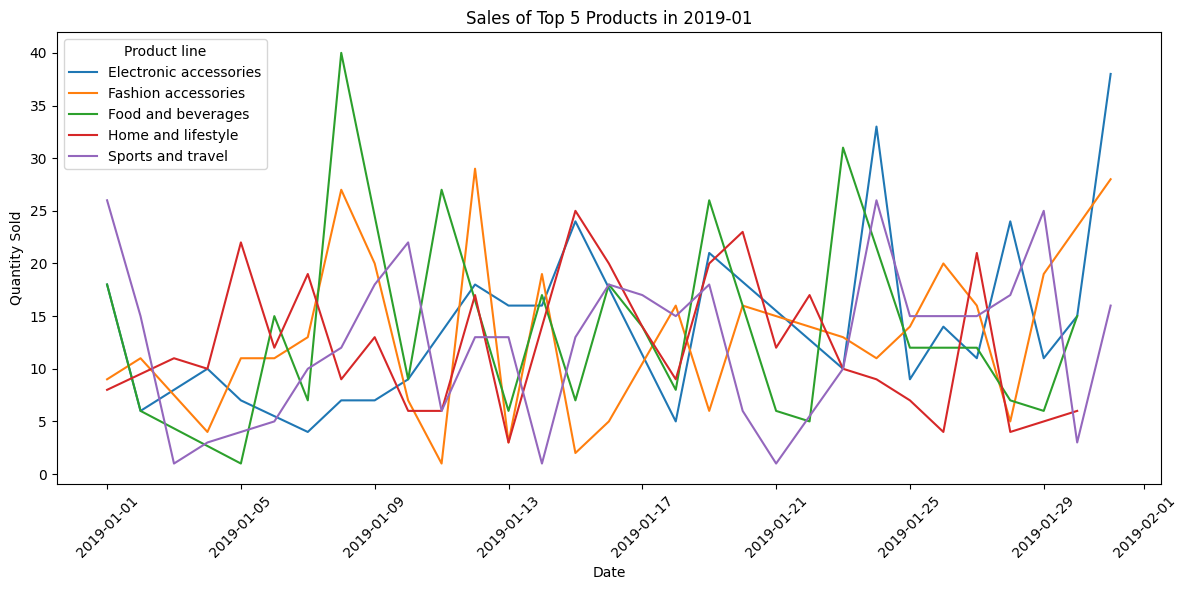

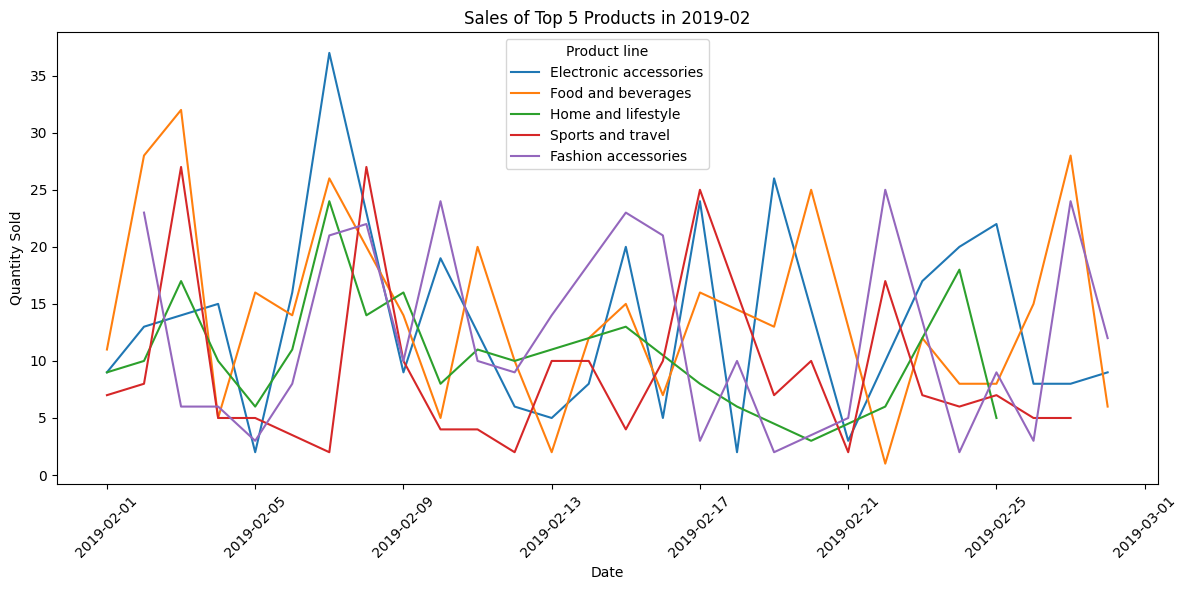

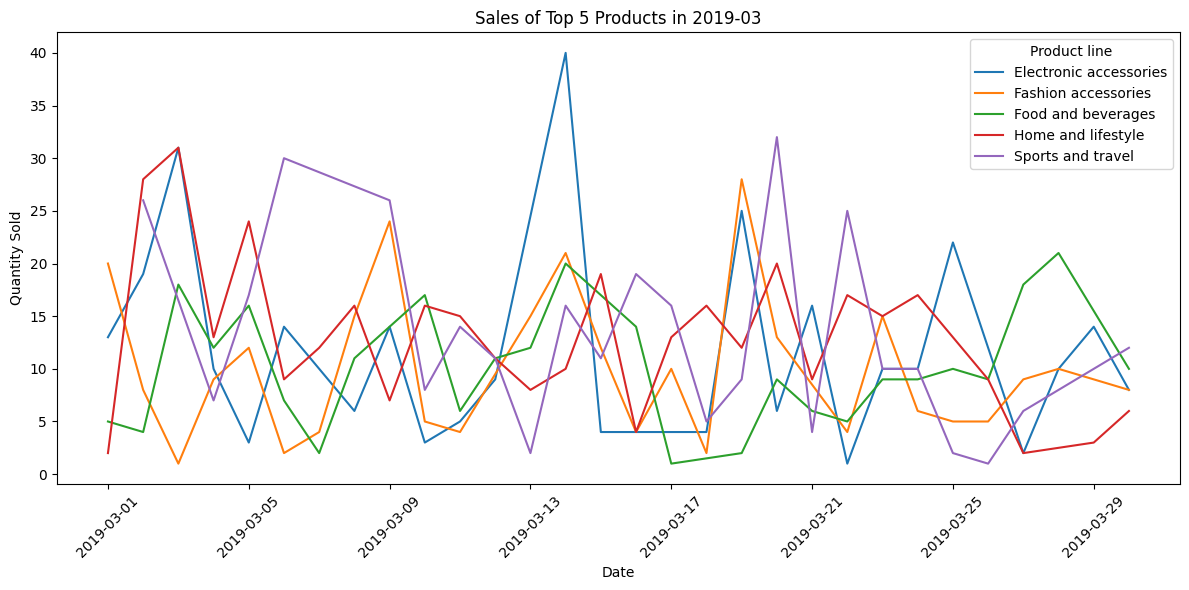

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

filtered_data['Date'] = pd.to_datetime(filtered_data['Date'])

filtered_data['Month'] = filtered_data['Date'].dt.to_period('M')

for month in filtered_data['Month'].unique():
    monthly_data = filtered_data[filtered_data['Month'] == month]
    plt.figure(figsize=(12, 6))
    sns.lineplot(x='Date', y='Quantity', hue='Product line', data=monthly_data)
    plt.title(f'Sales of Top 5 Products in {month}')
    plt.xlabel('Date')
    plt.ylabel('Quantity Sold')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


<ipython-input-32-504b0ecdb231>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Date'] = pd.to_datetime(filtered_data['Date'])


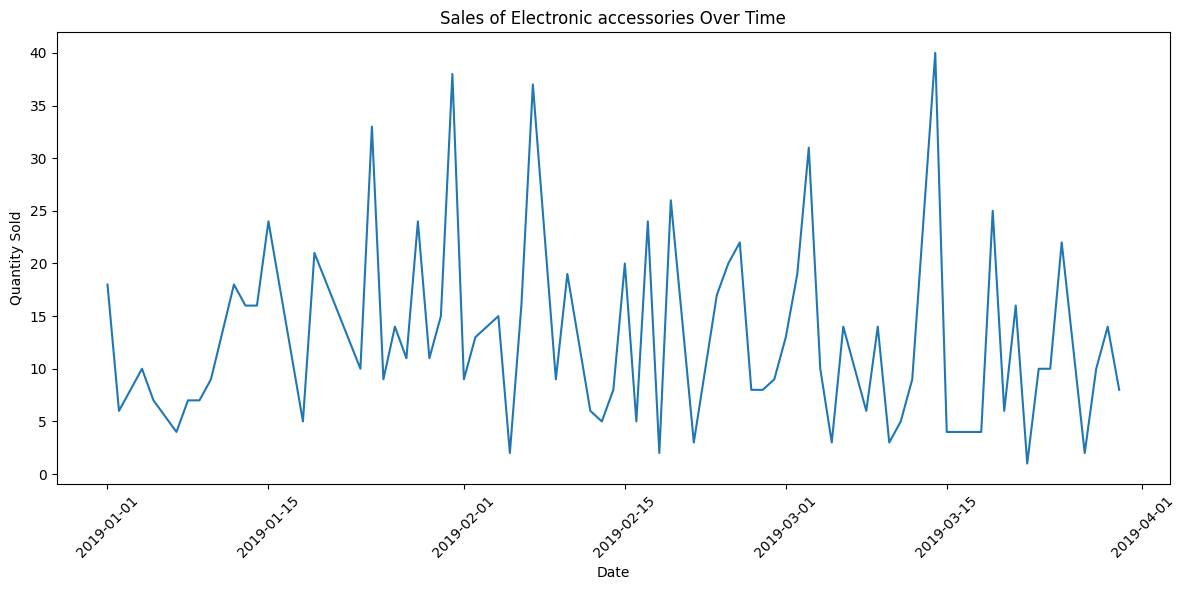

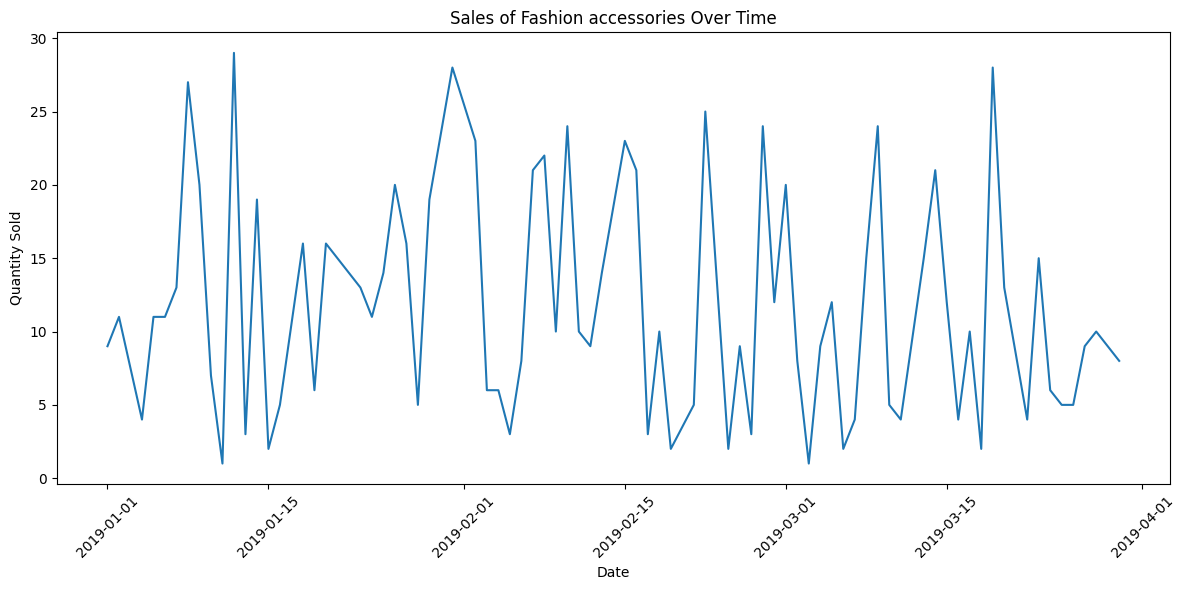

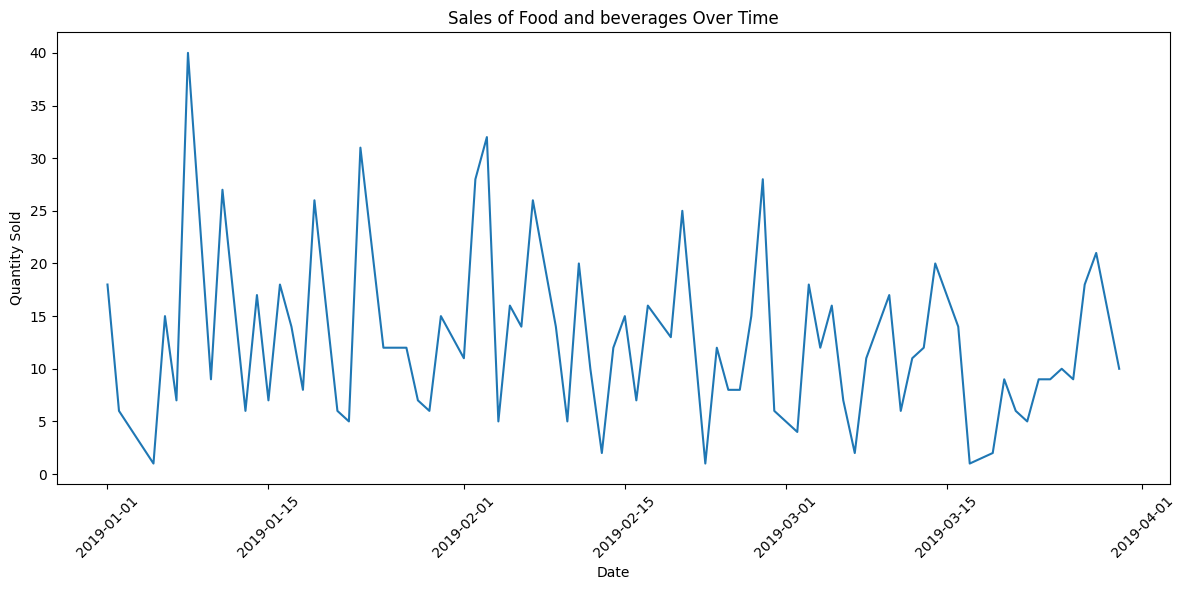

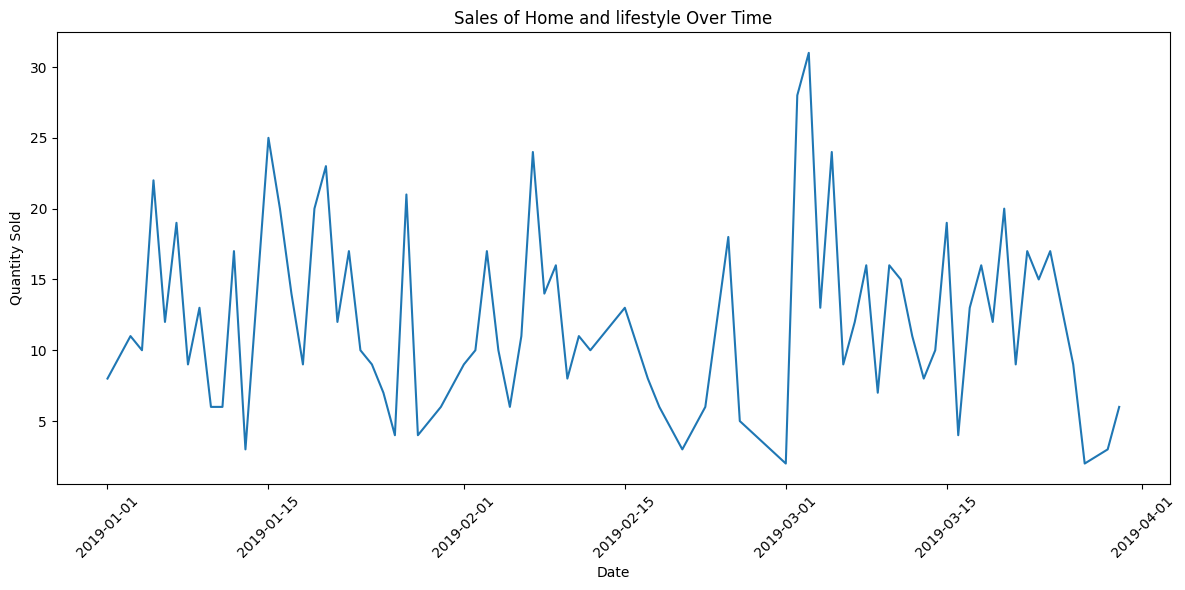

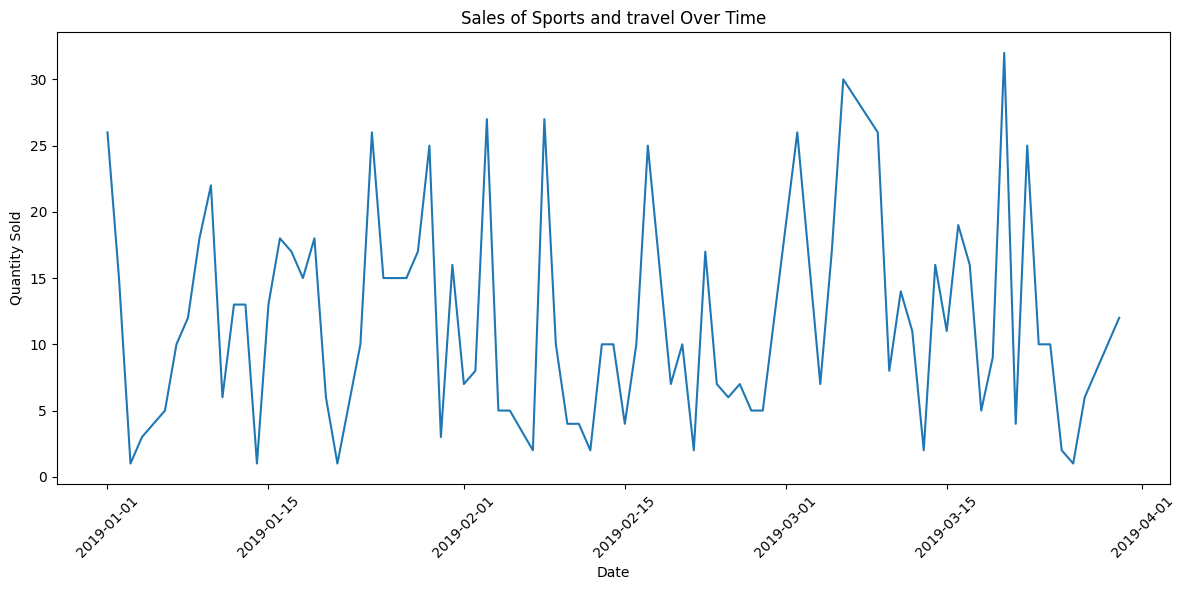

In [ ]:
filtered_data['Date'] = pd.to_datetime(filtered_data['Date'])

product_sales = filtered_data.groupby(['Product line', 'Date'])['Quantity'].sum().reset_index()

for product in product_sales['Product line'].unique():
    product_data = product_sales[product_sales['Product line'] == product]
    plt.figure(figsize=(12, 6))
    sns.lineplot(x='Date', y='Quantity', data=product_data)
    plt.title(f'Sales of {product} Over Time')
    plt.xlabel('Date')
    plt.ylabel('Quantity Sold')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [8]:
product_sales = data.groupby('Product line')['Total'].sum()

sales_above_100 = product_sales[product_sales > 100]
sales_below_100 = product_sales[product_sales < 100]

print("Products with sales above 100:")
print(sales_above_100)

print("\nProducts with sales below 100:")
sales_below_100


Products with sales above 100:
Product line
Electronic accessories    54337.5315
Fashion accessories       54305.8950
Food and beverages        56144.8440
Health and beauty         49193.7390
Home and lifestyle        53861.9130
Sports and travel         55122.8265
Name: Total, dtype: float64

Products with sales below 100:


,Total
Product line,


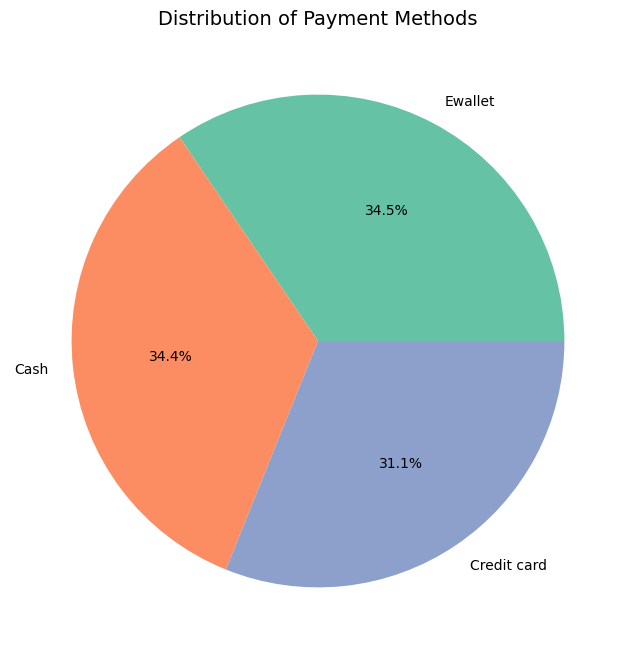

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 8))

payment_counts = data["Payment"].value_counts()
plt.pie(payment_counts, labels=payment_counts.index, autopct="%1.1f%%", colors=sns.color_palette("Set2"))
plt.title("Distribution of Payment Methods", fontsize=14)
plt.show()

<ipython-input-42-24718b351fbe>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_rating_per_category.values, y=avg_rating_per_category.index, palette="coolwarm")


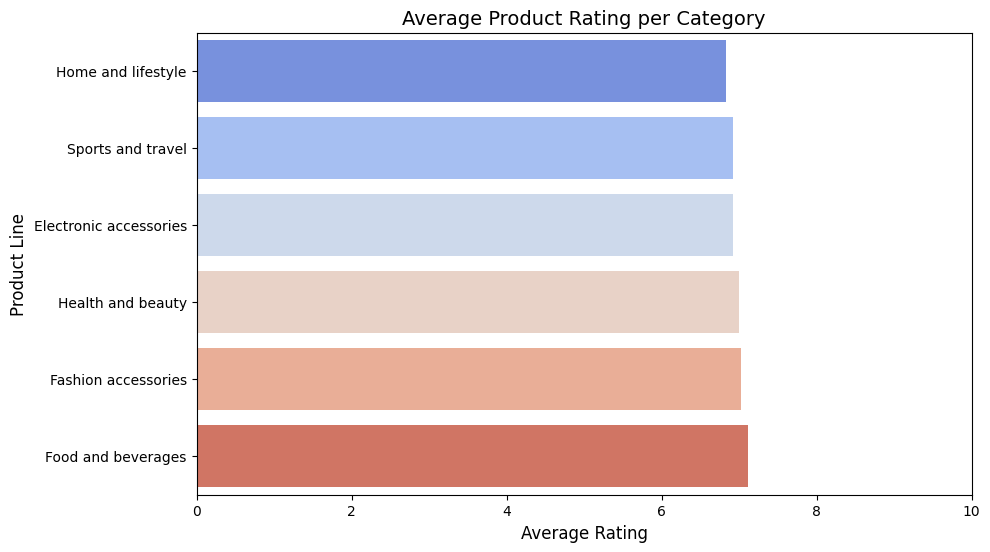

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))

avg_rating_per_category = data.groupby("Product line")["Rating"].mean().sort_values()
sns.barplot(x=avg_rating_per_category.values, y=avg_rating_per_category.index, palette="coolwarm")
plt.title("Average Product Rating per Category", fontsize=14)
plt.xlabel("Average Rating", fontsize=12)
plt.ylabel("Product Line", fontsize=12)
plt.xlim(0, 10)
plt.show()

<ipython-input-44-e9a647f7844f>:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data["Hour"] = pd.to_datetime(data["Time"]).dt.hour # Changed 'df' to 'data'


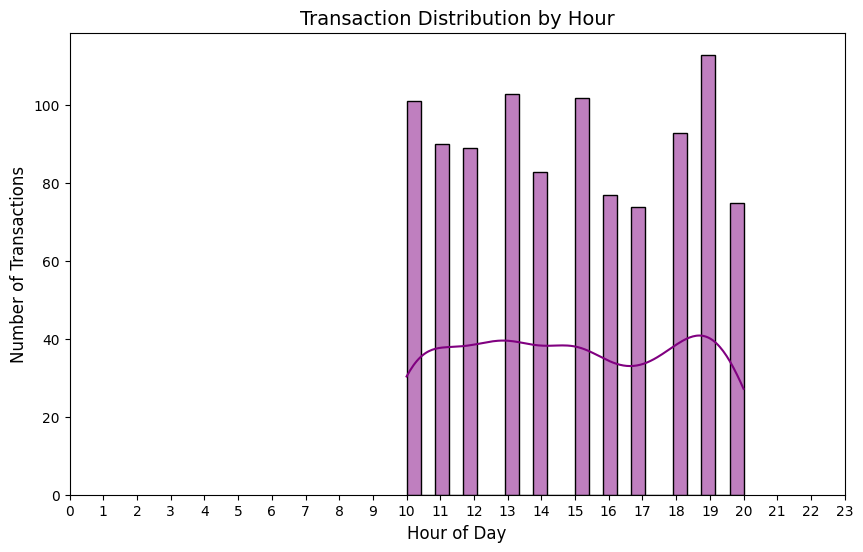

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

plt.figure(figsize=(10, 6))
data["Hour"] = pd.to_datetime(data["Time"]).dt.hour
sns.histplot(data["Hour"], bins=24, kde=True, color="purple")
plt.title("Transaction Distribution by Hour", fontsize=14)
plt.xlabel("Hour of Day", fontsize=12)
plt.ylabel("Number of Transactions", fontsize=12)
plt.xticks(range(0, 24))
plt.show()

<ipython-input-46-290eeef3c73e>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sales_per_gender.index, y=sales_per_gender.values, palette="pastel")


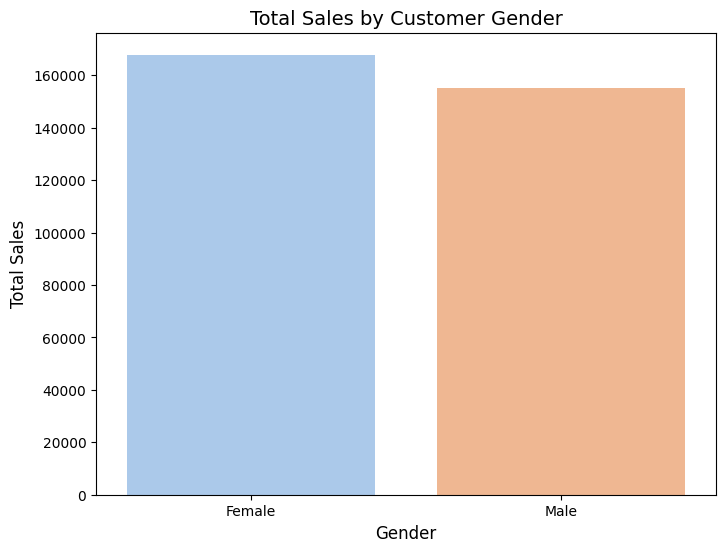

In [ ]:
plt.figure(figsize=(8, 6))

sales_per_gender = data.groupby("Gender")["Total"].sum()
sns.barplot(x=sales_per_gender.index, y=sales_per_gender.values, palette="pastel")
plt.title("Total Sales by Customer Gender", fontsize=14)
plt.xlabel("Gender", fontsize=12)
plt.ylabel("Total Sales", fontsize=12)
plt.show()

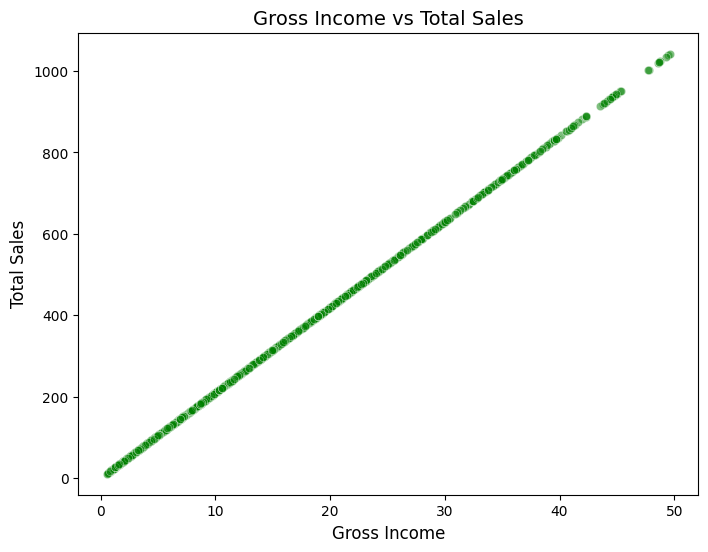

In [ ]:
plt.figure(figsize=(8, 6))

sns.scatterplot(x=data["gross income"], y=data["Total"], alpha=0.5, color="green")
plt.title("Gross Income vs Total Sales", fontsize=14)
plt.xlabel("Gross Income", fontsize=12)
plt.ylabel("Total Sales", fontsize=12)
plt.show()

<ipython-input-50-d552336366e5>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=profit_per_category.values, y=profit_per_category.index, palette="magma")


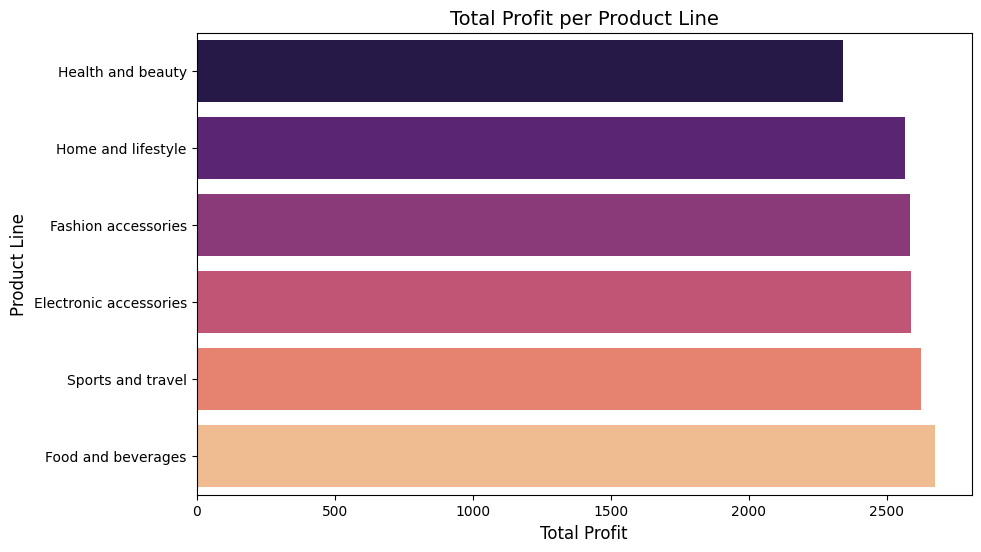

In [ ]:
plt.figure(figsize=(10, 6))
# Replace 'df' with 'data' to use the correct DataFrame
profit_per_category = data.groupby("Product line")["gross income"].sum().sort_values()
sns.barplot(x=profit_per_category.values, y=profit_per_category.index, palette="magma")
plt.title("Total Profit per Product Line", fontsize=14)
plt.xlabel("Total Profit", fontsize=12)
plt.ylabel("Product Line", fontsize=12)
plt.show()

<Figure size 1200x600 with 0 Axes>

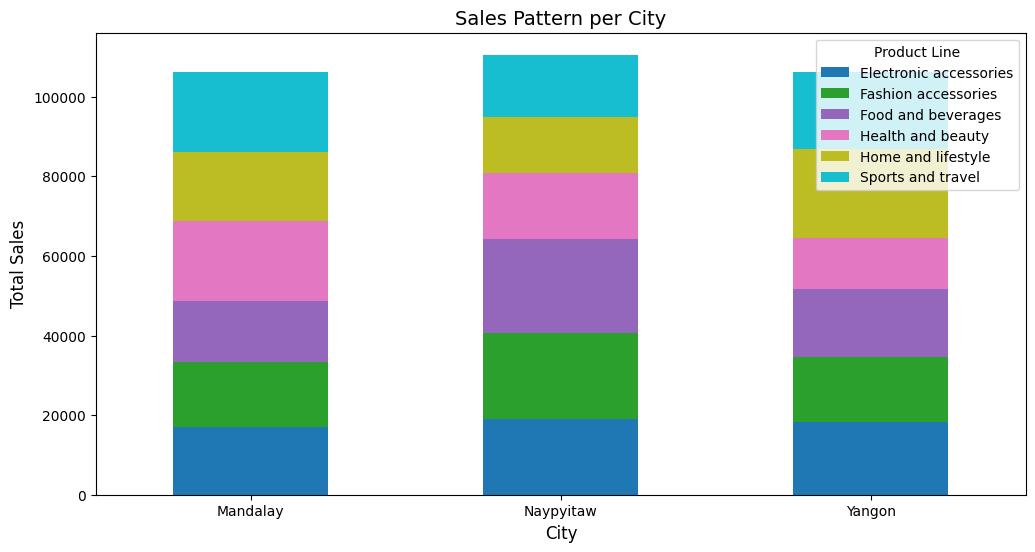

In [ ]:
plt.figure(figsize=(12, 6))

city_product_sales = data.groupby(["City", "Product line"])["Total"].sum().unstack()
city_product_sales.plot(kind="bar", stacked=True, colormap="tab10", figsize=(12, 6))
plt.title("Sales Pattern per City", fontsize=14)
plt.xlabel("City", fontsize=12)
plt.ylabel("Total Sales", fontsize=12)
plt.xticks(rotation=0)
plt.legend(title="Product Line")
plt.show()

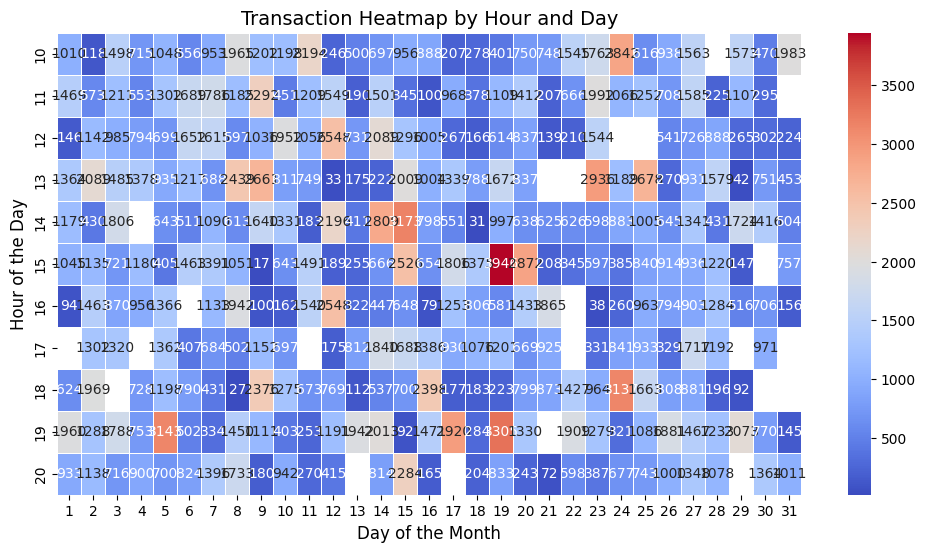

In [ ]:
data["Day"] = pd.to_datetime(data["Date"]).dt.day
pivot_table = data.pivot_table(values="Total", index="Hour", columns="Day", aggfunc="sum")

plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table, cmap="coolwarm", linewidths=0.5, annot=True, fmt=".0f")
plt.title("Transaction Heatmap by Hour and Day", fontsize=14)
plt.xlabel("Day of the Month", fontsize=12)
plt.ylabel("Hour of the Day", fontsize=12)
plt.show()